In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print('tf    version: {}'.format(tf.__version__) )
print('keras version: {}'.format(keras.__version__) )

tf    version: 2.2.0-dev20200218
keras version: 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

In [6]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [8]:
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))


model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', 
                      input_shape=x_train.shape[1:]),
    keras.layers.Dense(1), 
    
])
model.summary()
model.compile(loss=customized_mse, 
             optimizer = keras.optimizers.SGD(0.001),
              metrics=['mean_squared_error']
             )

callbacks = [keras.callbacks.EarlyStopping(patience=5, 
                                           min_delta=1e-2)
]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
%%time
history = model.fit(x_train_scaled, y_train, 
                    validation_data= (x_valid_scaled, y_valid), 
                   epochs = 30,
                    callbacks= callbacks
                   )

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4397 - mean_squared_error: 0.4397 - val_loss: 0.4673 - val_mean_squared_error: 0.4673
Epoch 2/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4382 - mean_squared_error: 0.4382 - val_loss: 0.4695 - val_mean_squared_error: 0.4695
Epoch 3/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4368 - mean_squared_error: 0.4368 - val_loss: 0.4638 - val_mean_squared_error: 0.4638
Epoch 4/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4350 - mean_squared_error: 0.4350 - val_loss: 0.4671 - val_mean_squared_error: 0.4671
Epoch 5/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4336 - mean_squared_error: 0.4336 - val_loss: 0.4640 - val_mean_squared_error: 0.4640
Epoch 6/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4321 - mean_squared_err

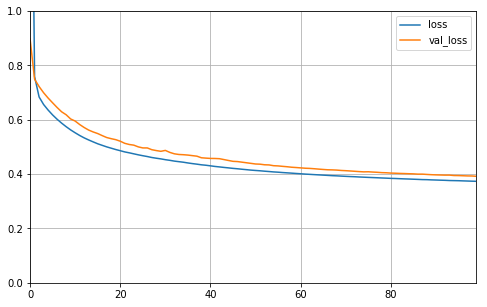

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
    
plot_learning_curves(history)

In [16]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 26us/sample - loss: 0.3915


0.3914905628492666